## Random Forest

In [1]:
# 라이브러리 불러오기
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd

Duplicate key in file WindowsPath('C:/Users/jinhyeongsik/anaconda3/Lib/site-packages/matplotlib/mpl-data/matplotlibrc'), line 815 ('font.family : Noto Sans KR')
Duplicate key in file WindowsPath('C:/Users/jinhyeongsik/anaconda3/Lib/site-packages/matplotlib/mpl-data/matplotlibrc'), line 816 ('font.sans-serif : Noto Sans KR')
Duplicate key in file WindowsPath('C:/Users/jinhyeongsik/anaconda3/Lib/site-packages/matplotlib/mpl-data/matplotlibrc'), line 817 ('axes.unicode_minus : False')


In [2]:
# 1. 데이터 로드
titanic = sns.load_dataset("titanic")

In [3]:
# 2. DataFrame의 구조 및 수치 확인
print(titanic.info())

print(titanic.describe)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None
<bound method NDFrame.describe of      survived  pclass     sex   age  sib

In [4]:
# 3. 학습용·테스트용 분할
X = titanic.drop(columns="survived")   # drop(columns="survived")을 통해 이 컬럼만 X에서 제거하고, 나머지 입력 특성(feature)들만 X에 남게 됨.
X_encoded = pd.get_dummies(X)   # 문자열 → 숫자로 인코딩
y = titanic["survived"]

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [5]:
# 4. 모델 정의 및 학습
model = RandomForestClassifier(max_depth=3, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=42)

In [6]:
#. 5 예측 및 평가
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

Accuracy: 1.00


C:\Users\jinhyeongsik\AppData\Local\Temp\ipykernel_2216\77310652.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_series_sorted, y=feat_series_sorted.index, palette='viridis')


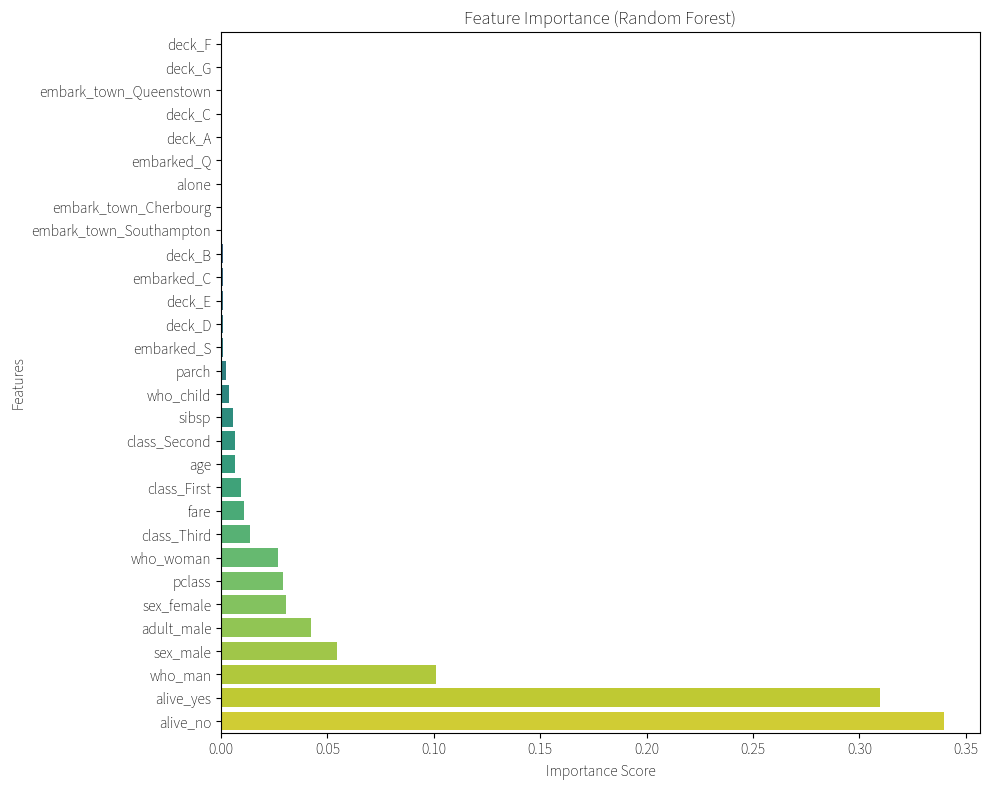

In [8]:
# 6. 시각화
# 특성 중요도
importances = model.feature_importances_

# 특성 이름
features = X_encoded.columns

# 중요도와 특성 이름 묶기 (Series로 만들면 시각화 편함)
feat_series = pd.Series(importances, index=features)

# 중요도 순으로 정렬
feat_series_sorted = feat_series.sort_values(ascending=True)

# 시각화
plt.figure(figsize=(10, 8))
sns.barplot(x=feat_series_sorted, y=feat_series_sorted.index, palette='viridis')
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()